In [1]:
from budget_analytics.utils.fileio import read_csv
from budget_analytics.utils.date import clean_date

print("hello world")

hello world


In [27]:
import datetime as dt

In [28]:
df = read_csv("daily_spending_20250920")
df.columns = ["Date", "Name", "Category", "Amount_GBP"]
df = df.dropna(subset="Date")
df["Date"] = df["Date"].map(clean_date)
df["Amount_GBP"] = df["Amount_GBP"].map(lambda s: str(s).replace(",","")).astype(float)
df["Month"] = df["Date"].map(lambda d: dt.date(d.year,d.month,1))

In [29]:
df.head()

,Date,Name,Category,Amount_GBP,Month
0,2022-08-22,Bedding set Noahsbox,Essential,37.1,2022-08-01
1,2022-08-27,Heathrow express,Transport,25.0,2022-08-01
2,2022-08-27,Taxi,Transport,18.8,2022-08-01
3,2022-08-27,M&S,Food,3.4,2022-08-01
4,2022-08-27,M&S,Essential,5.8,2022-08-01


<Axes: xlabel='Date'>

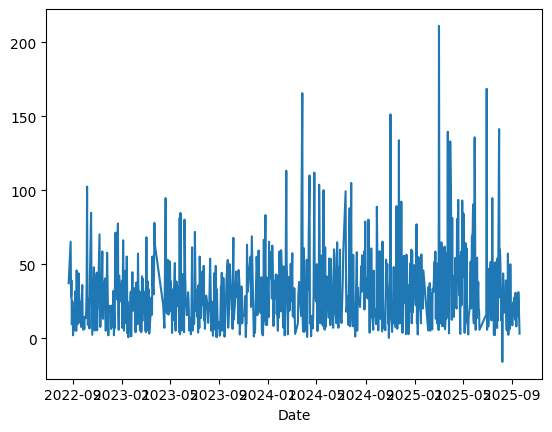

In [31]:
df.loc[~df["Category"].isin(["Phone","Rent","Travel"])].groupby(["Date"])["Amount_GBP"].sum().plot()

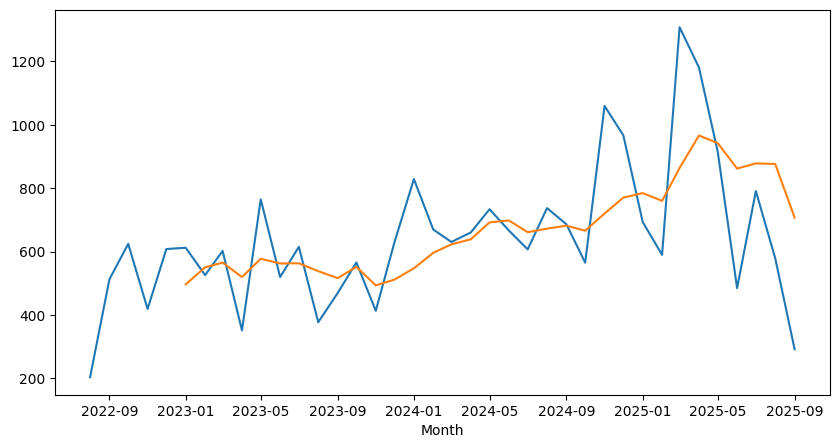

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(10,5))
df.loc[~df["Category"].isin(["Phone","Rent","Travel"])].groupby(["Month"])["Amount_GBP"].sum().plot(ax=ax)
df.loc[~df["Category"].isin(["Phone","Rent","Travel"])].groupby(["Month"])["Amount_GBP"].sum().rolling(6).mean().plot(ax=ax)
plt.show()

Category
Activity      Axes(0.125,0.11;0.775x0.77)
Bill          Axes(0.125,0.11;0.775x0.77)
Boo           Axes(0.125,0.11;0.775x0.77)
Cloth         Axes(0.125,0.11;0.775x0.77)
Essential     Axes(0.125,0.11;0.775x0.77)
Food          Axes(0.125,0.11;0.775x0.77)
Furniture     Axes(0.125,0.11;0.775x0.77)
Other         Axes(0.125,0.11;0.775x0.77)
Restaurant    Axes(0.125,0.11;0.775x0.77)
Transport     Axes(0.125,0.11;0.775x0.77)
dtype: object

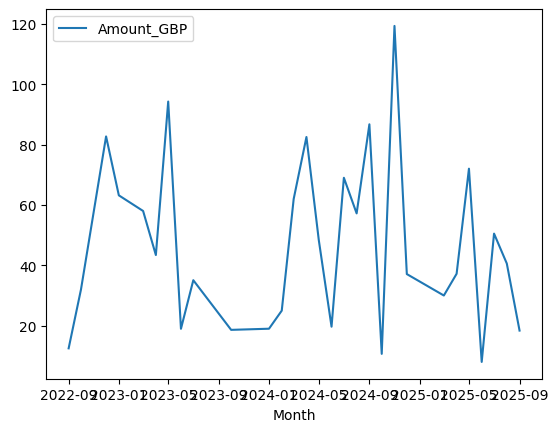

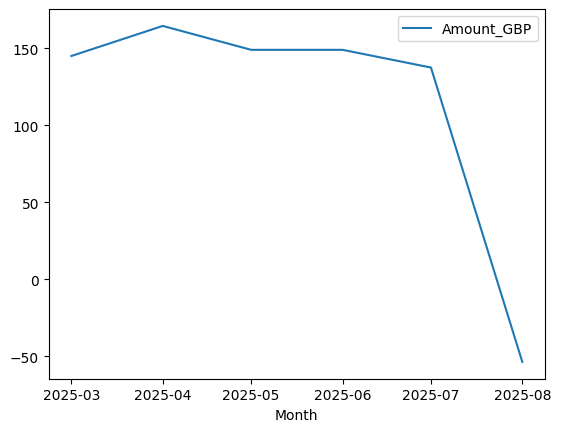

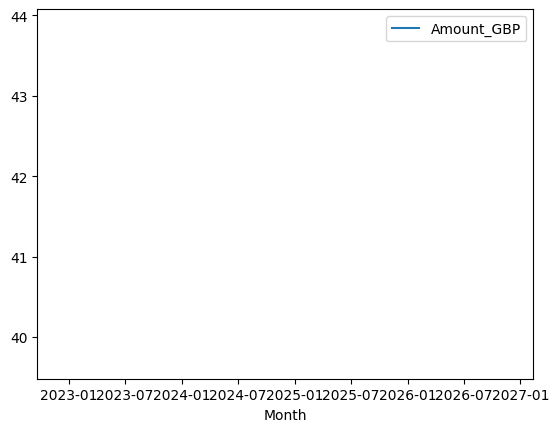

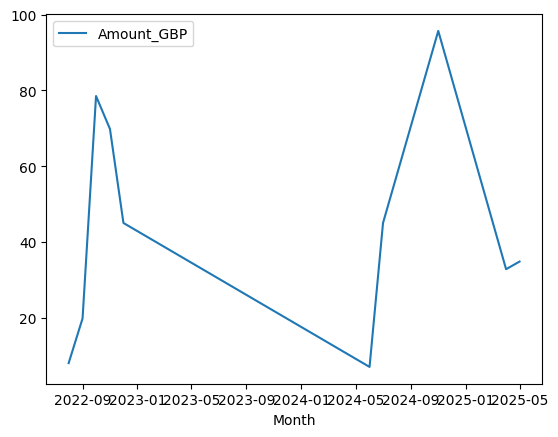

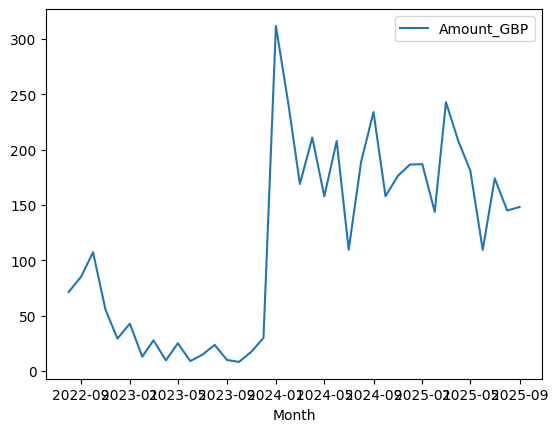

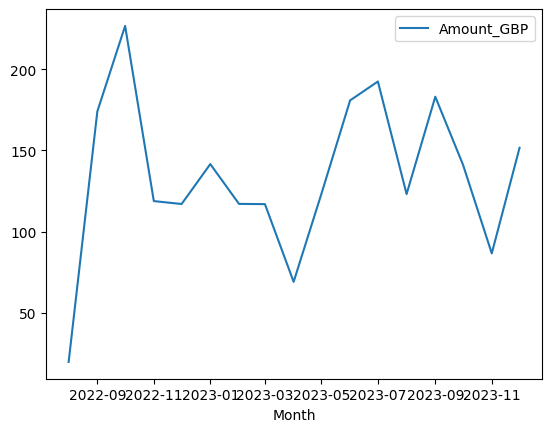

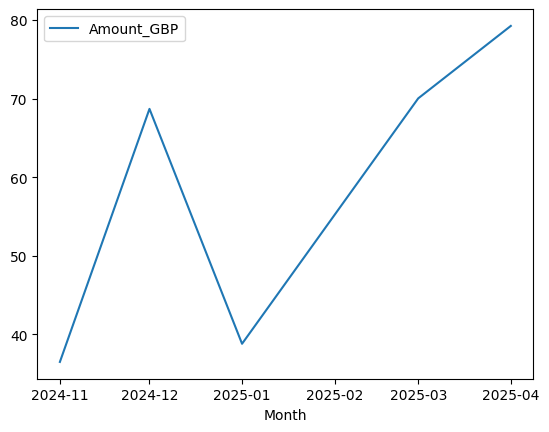

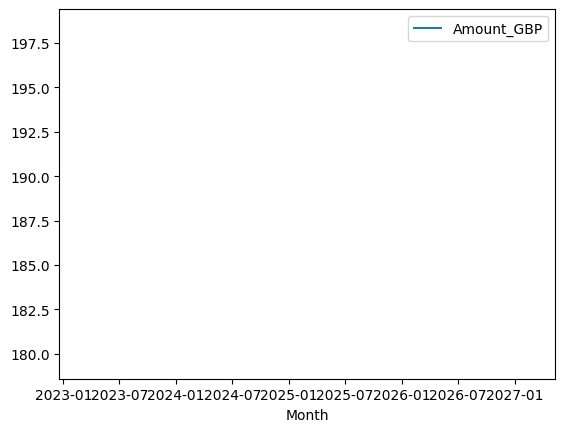

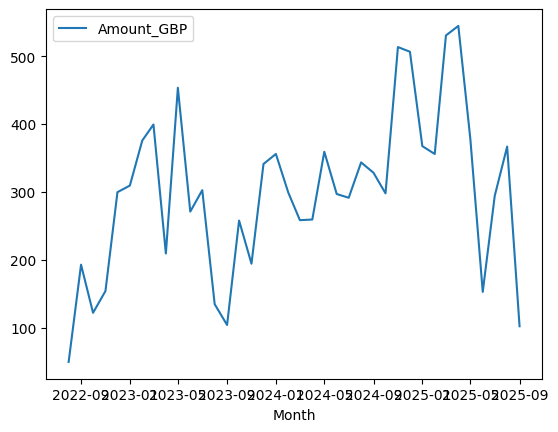

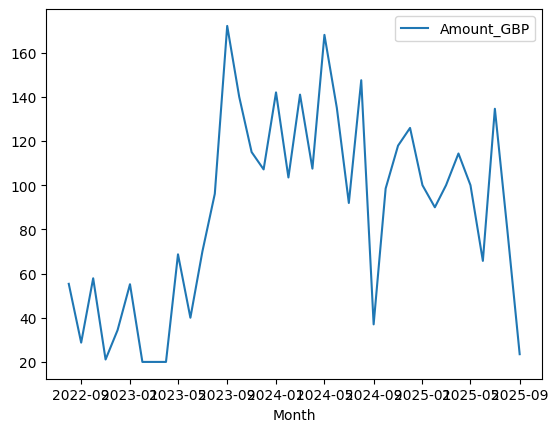

In [44]:
df.loc[~df["Category"].isin(["Phone","Rent","Travel"])].groupby(["Month","Category"])["Amount_GBP"].sum().reset_index("Category").groupby("Category").plot()